This is the Juypter Notebook for Joe McGrath's submission for the Udacity Machine Learning Engineer nanodegree program.
This file contains the relevant code-blocks, assiocated comments and visual aids to be used in conjunction with the written PDF piece.


In [1]:
#Intro code cell, in here the required libaries will be imported
#Comments etc.
#Data imported, results from other models saved for future reference
import numpy as np
import pandas as pd
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
#import visuals as vs
%matplotlib inline
#Plotting libaries
#Machine Learning libaries 
from sklearn.model_selection import train_test_split


In [5]:
data = pd.read_csv('data/train.csv')
data = pd.DataFrame(data)

#Summary statistics
#Target variables
#Double [[]] wrapping ensure stays as pandas dataframe
targData=data[['critical_temp']]
#Feature variables
#Dropping the target variables from the data-set
featData=data.drop(['critical_temp'],axis=1)
##Such that we are left with only the extracted features from the material properties
featData=featData.drop(['number_of_elements'],axis=1)
#featData.describe().transpose()

#Data Transformation
#Applying lograthmic and Scaling to the data-set prior to training/testing
#Applying lograthmic transformation to the data-set
#cols=list(featData)
#featData[cols] = featData[cols].apply(lambda x: np.log(x + 1))
#featData.describe().transpose()
# Visualize the new log distributions
#vs.distribution(features_log_transformed, transformed = True)

#Applying a scaler to the data-set in order to normalise the date (0,1)
#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledData=pd.DataFrame(data=featData)
scaledData.head()
scaledData[cols]=scaler.fit_transform(scaledData[cols])
#scaledData.describe().transpose()



In [57]:
#Lasso Regression
#Feature selection
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

#Data has been normalised via MaxMinScaler
##Lasso Regression
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(scaledData, targData, test_size=0.20, random_state=42)
#clf = linear_model.Lasso(alpha=0.5,max_iter=10,tol=0.01,random_state=42)
clf = linear_model.Lasso(alpha=0.8,random_state=42,tol=0.0001,selection='cyclic',max_iter=1000)

##Using the Select From Model Approach##
model_select=SelectFromModel(clf,prefit=False,threshold=0.10)
model_select.fit(X_train,y_train)
#model_select.transform(X_train)

##Using the Recursive Feature Selection Approach##
model_select_rfe=RFE(clf,n_features_to_select=9)
model_select_rfe.fit(X_train,y_train)
#model_select_rfe.transform(X_train)

##Using the Recursive Feature Selection Approach with Cross-Validation##
model_select_RFECV=RFECV(clf)
model_select_RFECV.fit(X_train,y_train)
#model_select_RFECV.transform(X_train)

#clf_lars=linear_model.LassoLarsCV()
#clf_lars.fit(sfm.transform(X_train),y_train)

#mean_squared_error(clf.predict(X_test),y_test)

/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFECV(cv=None,
   estimator=Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [58]:
##Using the Select From Model Approach##
print(X_train.columns[model_select.get_support()])
##Using the Recursive Feature Selection Approach##
print("GAP")
print(X_train.columns[model_select_rfe.get_support()])
##Using the Recursive Feature Selection Approach with Cross-Validation##
print(X_train.columns[model_select_RFECV.get_support()])


Index(['wtd_entropy_atomic_mass', 'range_atomic_mass', 'range_atomic_radius',
       'wtd_std_ThermalConductivity'],
      dtype='object')
GAP
Index(['wtd_entropy_atomic_mass', 'range_atomic_mass', 'range_atomic_radius',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity'],
      dtype='object')
Index(['wtd_entropy_atomic_mass', 'range_atomic_mass', 'range_atomic_radius',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity'],
      dtype='object')


In [50]:
model_select_RFECV.transform(X_train)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [71]:
#Additional code block for defining functions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score,mean_squared_error
#mean_squared_error(y_true,y_pred)
#explained_variance_score(y_true,y_pred)

# Training func
def trainer(train,res,model):
    #Note start time
    st=time.time()
    model.fit(train,res)
    #Note time taken to train model
    timeTaken=time.time()-st
    return model

# Testing func
# Evaluation results

3.337860107421875e-06

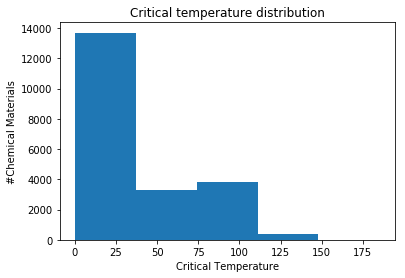

/home/jmcgrath/.local/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


NameError: name 'df' is not defined

In [7]:
#Accompanying visuals - Ensure all graph's are titled and axes labeled
import matplotlib.pyplot as plt
data = pd.read_csv('data/train.csv')
data = pd.DataFrame(data)
#Summary statistics
#Target variables
#Double [[]] wrapping ensure stays as pandas dataframe
targData=data[['critical_temp']]
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(targData['critical_temp'],bins=5)
plt.title('Critical temperature distribution')
plt.xlabel('Critical Temperature')
plt.ylabel('#Chemical Materials')
plt.show()

#Visuals module - Look into this module for displaying data
#vs.distribution(targData['critical_temp'])

#Feature variables
#Dropping the target variables from the data-set
#featData=data.drop(['critical_temp'],axis=1)
#ScatterPlot
fig2=plt.figure
ax = fig.add_subplot(1,1,1)
ax.scatter(df['mean_atomic_mass'],df['mean_Valence'])
#featData.describe().transpose()
#Univariate visualization
#Bivariate/Multivariate visalisations
#Data clustering
#list(featData)


In [51]:
#Creation of benchmark linear SVM
#As suggested in Capstone Proposal feedback, it was propsed to create a
#benchmark model in order to guage how the models
#Importing required models from sklearn
from sklearn import svm
clf_svm=svm.SVR(C=1.0)
clf_svm.fit(model_select_RFECV.transform(X_train), y_train)
mean_squared_error(clf_svm.predict(model_select_RFECV.transform(X_test)),y_test)

/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


410.0245885313692

In [54]:
#Importing required models from sklearn
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
#Training the models
#Random Forest
clf_rf=RandomForestRegressor(n_estimators=10,max_depth=20,random_state=42)
clf_rf.fit(model_select_RFECV.transform(X_train), y_train)
a=mean_squared_error(clf_rf.predict(model_select_RFECV.transform(X_test)),y_test)
#Neural Network
from sklearn import preprocessing
from keras import models
from keras import layers

# Start neural network
##https://chrisalbon.com/deep_learning/keras/feedforward_neural_network_for_regression/
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu', input_shape=(model_select_RFECV.transform(X_train).shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu'))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))
network.compile(loss='mse',optimizer='RMSprop')
network.fit(model_select_RFECV.transform(X_train), y_train, epochs=100,batch_size=10)
b=mean_squared_error(network.predict(model_select_RFECV.transform(X_test)),y_test)
print(a,b)
#Validating the training

/home/jmcgrath/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Epoch 1/100
17010/17010 [==============================] - 3s 194us/step - loss: 718.0403
Epoch 2/100
17010/17010 [==============================] - 2s 115us/step - loss: 495.0749
Epoch 3/100
17010/17010 [==============================] - 2s 116us/step - loss: 439.1282
Epoch 4/100
17010/17010 [==============================] - 3s 151us/step - loss: 401.9616
Epoch 5/100
17010/17010 [==============================] - 3s 151us/step - loss: 380.6582
Epoch 6/100
17010/17010 [==============================] - 3s 154us/step - loss: 368.4849
Epoch 7/100
17010/17010 [==============================] - 2s 141us/step - loss: 361.4628
Epoch 8/100
17010/17010 [==============================] - 2s 139us/step - loss: 356.2898
Epoch 9/100
17010/17010 [==============================] - 2s 146us/step - loss: 350.9241
Epoch 10/100
17010/17010 [==============================] - 2s 131us/step - loss: 347.9927
Epoch 11/100
17010/17010 [==============================] - 2s 124us/step - loss: 343.5743
Epoch 12

17010/17010 [==============================] - 2s 102us/step - loss: 268.3284
Epoch 91/100
17010/17010 [==============================] - 2s 102us/step - loss: 266.7056
Epoch 92/100
17010/17010 [==============================] - 2s 101us/step - loss: 266.9421
Epoch 93/100
17010/17010 [==============================] - 2s 103us/step - loss: 267.2265
Epoch 94/100
17010/17010 [==============================] - 2s 102us/step - loss: 267.5374
Epoch 95/100
17010/17010 [==============================] - 2s 99us/step - loss: 266.5442
Epoch 96/100
17010/17010 [==============================] - 2s 99us/step - loss: 266.1841
Epoch 97/100
17010/17010 [==============================] - 2s 100us/step - loss: 266.6757
Epoch 98/100
17010/17010 [==============================] - 2s 99us/step - loss: 266.2085
Epoch 99/100
17010/17010 [==============================] - 2s 99us/step - loss: 265.9167
Epoch 100/100
17010/17010 [==============================] - 2s 100us/step - loss: 265.5802
105.88554059858

In [ ]:
#Refining the model prior to testing
#Evaluation paraemters etc

In [ ]:
#Testing the model

In [ ]:
#Evaluating the final results
#Accuracy - Comparsion to benchmark models